# My First Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [113]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [114]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [115]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [116]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 6850
다음 그림은 Frog 입니다.


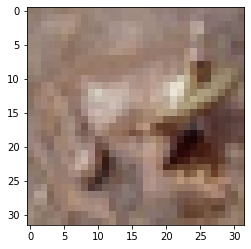

In [117]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

In [118]:
mean_x = train_x.mean()
std_x = train_x.std()

train_x = (train_x - mean_x) / std_x
test_x = (test_x - mean_x) / std_x

### Y : One-Hot Encoding

In [119]:
from tensorflow.keras.utils import to_categorical

In [120]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [121]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

### 코드를 완성해주세요!

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [122]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten

In [123]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 레이어 엮기
il = Input(shape=(32, 32, 3))
hl = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(il)
hl = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = MaxPool2D()(hl)
hl = Dropout(0.25)(hl)

hl = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(hl)
hl = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = MaxPool2D()(hl)
hl = Dropout(0.25)(hl)

hl = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(hl)
hl = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = MaxPool2D()(hl)
hl = Dropout(0.25)(hl)

hl = Flatten()(hl)
hl = Dense(1024, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.35)(hl)

ol = Dense(10, activation='softmax')(hl)

# 3. 모델 인풋 아웃풋 선언
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(train_x, train_y, validation_split=0.2,
                    callbacks=[es], epochs=10000, batch_size=128)

Epoch 1/10000
313/313 [==============================] - 7s 11ms/step - loss: 1.7210 - accuracy: 0.4372 - val_loss: 4.5003 - val_accuracy: 0.2287
Epoch 2/10000
313/313 [==============================] - 3s 9ms/step - loss: 1.1516 - accuracy: 0.5989 - val_loss: 1.0285 - val_accuracy: 0.6443
Epoch 3/10000
313/313 [==============================] - 3s 9ms/step - loss: 0.9205 - accuracy: 0.6773 - val_loss: 0.8218 - val_accuracy: 0.7145
Epoch 4/10000
313/313 [==============================] - 3s 9ms/step - loss: 0.7901 - accuracy: 0.7229 - val_loss: 0.8075 - val_accuracy: 0.7196
Epoch 5/10000
313/313 [==============================] - 3s 9ms/step - loss: 0.7115 - accuracy: 0.7502 - val_loss: 0.7068 - val_accuracy: 0.7550
Epoch 6/10000
313/313 [==============================] - 3s 9ms/step - loss: 0.6428 - accuracy: 0.7722 - val_loss: 0.6995 - val_accuracy: 0.7654
Epoch 7/10000
313/313 [==============================] - 3s 9ms/step - loss: 0.5911 - accuracy: 0.7923 - val_loss: 0.6811 - val_a

### 성능 평가

In [102]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

100/100 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.8155
Test Loss : 0.565440,  Test Accuracy : 81.550%


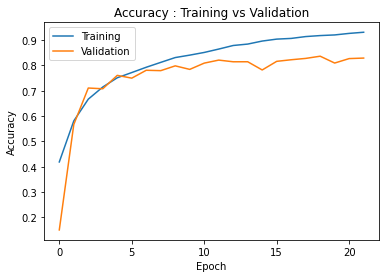

In [103]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

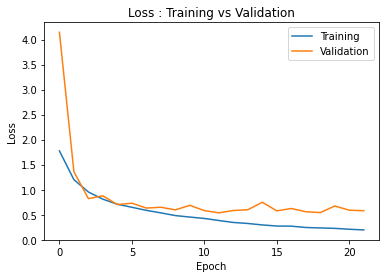

In [104]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [105]:
# 원핫 인코딩 해제 : 카테고리 중 가장 높은 값
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [106]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 2ms/step
CNN
트레이닝 정확도 : 92.05%
테스트 정확도 : 81.55%


id = 8611
다음 그림은 Horse 입니다.
모델의 예측 : Horse
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 99.0, 'Ship': 0.0, 'Truck': 0.0}
정답입니다


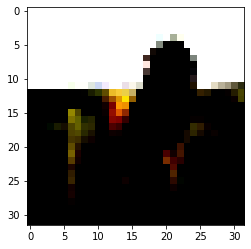

In [107]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 1230
다음 그림은 Dog 입니다.
모델의 예측 : Cat
모델의 카테고리별 확률 : 
{'Airplane': 8.0, 'Automobile': 8.0, 'Bird': 6.0, 'Cat': 60.0, 'Deer': 0.0, 'Dog': 7.0, 'Frog': 6.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 2.0}
틀렸어요


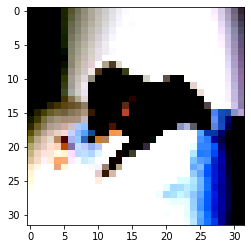

In [108]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()